# Classifiers, Autoencoders, Transfer Learning and More...


ChatGPT

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Example image from the dataset:

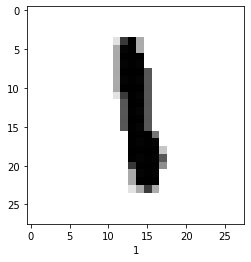

In [3]:
image_index = 200

plt.figure()
plt.imshow(train_images[image_index], cmap=plt.cm.binary)
plt.xlabel(train_labels[image_index])
plt.show()

Convert to a more usable format 

In [4]:
train_images = (train_images / 255.0).astype("float32") 
test_images = (test_images / 255.0).astype("float32")

# 255 => 1 
# 0 => 0 
# 127.5 => 0.5

# Define the model 

Autoencoders typically compress the data before decompressing it. 


In [5]:
image_width = train_images.shape[1]
image_height = train_images.shape[2]

train_images.shape

(60000, 28, 28)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_width, image_height)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
)

In [8]:
stats = model.fit(
  train_images, 
  train_labels,
  epochs=10,
  verbose= False
)

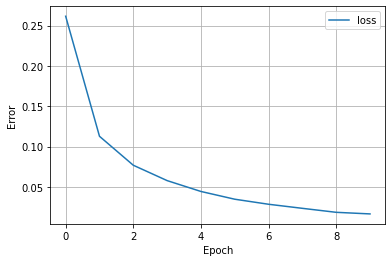

In [9]:
plt.plot(stats.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [10]:
predict_value = 1

prediction_first_val = model.predict(np.array([test_images[predict_value]]))

print(prediction_first_val[0])
print()
print(sum(prediction_first_val[0]))

1/1 [==============================] - 0s 70ms/step
[2.7607066e-12 1.3526965e-05 9.9998605e-01 1.8497455e-07 5.1874952e-19
 1.0807661e-08 4.2080658e-12 3.9674800e-19 2.3684974e-07 2.2306928e-15]

1.000000012116773


Get the predicted value: 

In [11]:
print(np.argmax(prediction_first_val), test_labels[predict_value])

2 2


# Autoencoders

**Generative machine learning**

Rather than discriminative

In [56]:
latent_dim = 128

reduction = (latent_dim - (image_width * image_height)) / (image_width * image_height)

print(f"{abs(reduction * 100)}%")

83.6734693877551%


In [57]:
class Autoencoder(tf.keras.models.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()

    self.encoder = tf.keras.Sequential([
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(latent_dim, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(image_width * image_height, activation='sigmoid'),
      tf.keras.layers.Reshape((image_width, image_height))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [58]:
autoencoder = Autoencoder(latent_dim)

In [59]:
autoencoder.compile(optimizer='adam', loss="mean_squared_error")

In [60]:
stats = autoencoder.fit(
    train_images, 
    train_images,
    epochs=10,
    shuffle=True,
    validation_data=(test_images, test_images)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0211 - val_loss: 0.0096
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0083 - val_loss: 0.0069
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0042 - val_loss: 0.0039
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

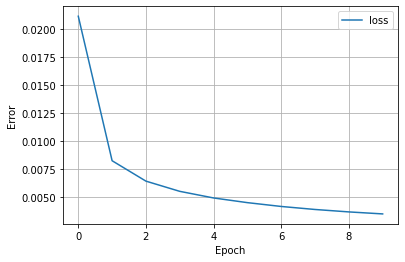

In [61]:
plt.plot(stats.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

Try compression and then decompression

In [62]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

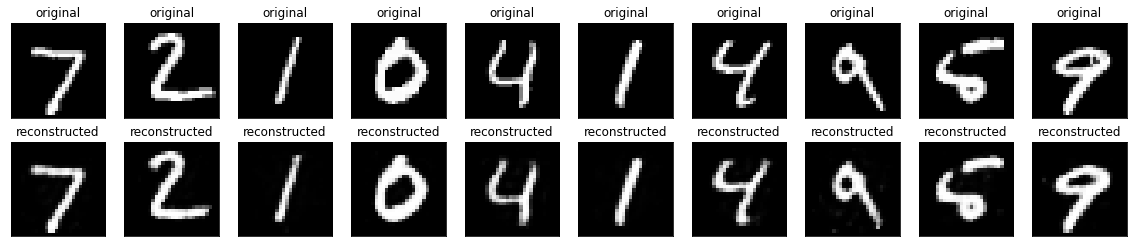

In [63]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_images[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Transfer Learning**

Finetuning previous models that have been pretrained

Less boring wait times

In [20]:
transfer_model = tf.keras.Sequential([
    autoencoder.encoder,
    tf.keras.layers.Dense(2),
    tf.keras.layers.Softmax()
])

In [21]:
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [22]:
binary_data = np.array([
    0 if x < 5 else 1 
    for x in train_labels
])

print(binary_data)

[1 0 0 ... 1 1 1]


In [23]:
stats_v3 = transfer_model.fit(
  train_images, 
  binary_data,
  epochs=1,
  verbose= True
)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1973 - accuracy: 0.9357


In [24]:
image_to_predict = 50

image = np.array([test_images[image_to_predict]])


prediction_first_val_v2 = transfer_model.predict(image)

print(f"VALUE: \t\t{test_labels[image_to_predict]}")
print(f"PREDICTION: \t{np.argmax(prediction_first_val_v2)}")

1/1 [==============================] - 0s 72ms/step
VALUE: 		6
PREDICTION: 	1


**Generating images of numbers**

In [64]:
generator_model = tf.keras.Sequential([
    tf.keras.layers.Dense(latent_dim, activation='relu'),
    autoencoder.decoder,
])

In [65]:
generator_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [66]:
def one_hot(value: int, size: int):
  return [0 if x != value else 1 for x in range(size)]

one_hot_labels = np.array([
    one_hot(x, 10)
    for x in train_labels
])

In [67]:
one_hot_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [68]:
stats_v4 = generator_model.fit(
  one_hot_labels, 
  train_images,
  epochs=5,
  verbose= True
)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0551 - accuracy: 0.1082
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.1121
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.1119
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.1117
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.1114


Show generated images

1/1 [==============================] - 0s 85ms/step


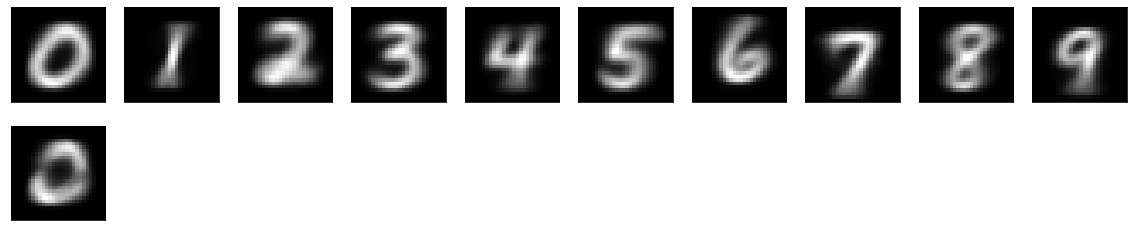

In [69]:
image_labels_to_generate = [
    one_hot(x, 10)
    for x in range(10)
]

image_labels_to_generate += [[1,0,1,0,0,0,0,0,0,0]]

generated_images = generator_model.predict(np.array(
  image_labels_to_generate
))


plt.figure(figsize=(20, 4))
for i, image in enumerate(generated_images):

  ax = plt.subplot(2, n, i + 1)
  plt.imshow(image)

  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()